# Text Analysis

We will explore exploratory data analysis and supervised learning for free text in this lecture. In the next lecture, we will look at unsupervised learning and topic models.

Along the way, we will use the packages

- [`sklearn`](http://scikit-learn.org/stable/)
- [`wordcloud`](https://github.com/amueller/word_cloud)
- [`nltk`](https://www.nltk.org)
- [`gensim`](https://radimrehurek.com/gensim/)
- [`spaCy`](https://spacy.io)

Other packages useful for text analysis include

- [`fasttext`](https://fasttext.cc/)

and many, many others.

## Exploratory data analysis

### Corpus

A corpus is a collection of text documents. There are many ways to create a corpus, and they may come from documents, scraped web pages, Twitter streams, speech translation and so on. The first step in any text analysis application is nearly always to create an application-specific corpus. This is important, because the language patterns in different domains are often very different (e.g. contrast medical records with legal documents with Twitter streams). 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5)

In [2]:
import numpy as np
import pandas as pd

In [3]:
import nltk
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.collocations import QuadgramCollocationFinder, TrigramCollocationFinder
from nltk.metrics.association import QuadgramAssocMeasures, TrigramAssocMeasures
import string

#### Toy corpus

We see how a small corpus with two documents is broken down into smaller pieces 

document $\to$ paragraph $\to$ sentences $\to$ tokens

Although this explicit decomposition may not be necessary in all applications, it is still useful to be aware of these units:

- A paragraph contains an *idea*
- A sentence is a unit of syntax
- A token (word or punctuation) is the smallest meaningful unit

In [4]:
docs = [
    '''Spicy jalapeno bacon ipsum dolor amet aute prosciutto velit corned beef consectetur. Aute kielbasa adipisicing, nostrud drumstick ipsum tail pig capicola burgdoggen corned beef. Dolor proident salami deserunt. Venison capicola pork belly bacon aliquip swine incididunt sint quis cupidatat pork chop et turducken nulla beef. Ground round kielbasa tri-tip consectetur, t-bone pariatur deserunt id ut adipisicing.

Strip steak meatball chuck aute, pork loin turkey pork commodo et officia. Rump enim spare ribs, prosciutto chuck deserunt tail. Aute pork lorem sausage. Nostrud dolore kevin proident pork chop do in. Exercitation shoulder dolore kevin ut, sausage ullamco frankfurter ham hock. Ground round fatback ribeye turkey tri-tip capicola.''',
    '''Burgdoggen id ham hock ut kielbasa. Eu pork chop anim picanha sed porchetta dolor consequat drumstick shankle proident pork andouille. Et cupim burgdoggen, officia lorem shank ut sed drumstick shankle salami ad ball tip dolore pig. Shankle turkey officia, reprehenderit bacon ipsum ullamco enim tail tongue. Brisket short ribs biltong jerky flank, venison filet mignon tenderloin culpa bacon meatball short loin commodo. Leberkas jowl prosciutto, et kielbasa pancetta chicken. Nisi minim sausage porchetta jowl.

Beef ribs pariatur pork chop dolore ex, consequat turducken frankfurter esse filet mignon lorem bacon. Elit dolore porchetta meatball ea, pork loin pork anim non sirloin. Aliquip tenderloin reprehenderit pariatur, leberkas alcatra short loin. Fugiat elit meatloaf, nulla cow in sausage. Doner consequat shankle salami est, boudin deserunt. Drumstick ham lorem reprehenderit.

Beef adipisicing nisi rump filet mignon cillum leberkas boudin tail picanha pork loin. Culpa picanha ground round in laborum spare ribs. Burgdoggen leberkas landjaeger adipisicing strip steak velit doner eu ground round meatloaf consectetur deserunt anim ball tip cow. Porchetta ad minim eiusmod labore eu nisi boudin laboris officia jowl deserunt strip steak. Shank aliquip beef ribs tri-tip ipsum flank. Turducken elit meatloaf aliqua corned beef sirloin irure. Tongue cupim ullamco in sint prosciutto.'''
]

##### Documents

In [5]:
docs

['Spicy jalapeno bacon ipsum dolor amet aute prosciutto velit corned beef consectetur. Aute kielbasa adipisicing, nostrud drumstick ipsum tail pig capicola burgdoggen corned beef. Dolor proident salami deserunt. Venison capicola pork belly bacon aliquip swine incididunt sint quis cupidatat pork chop et turducken nulla beef. Ground round kielbasa tri-tip consectetur, t-bone pariatur deserunt id ut adipisicing.\n\nStrip steak meatball chuck aute, pork loin turkey pork commodo et officia. Rump enim spare ribs, prosciutto chuck deserunt tail. Aute pork lorem sausage. Nostrud dolore kevin proident pork chop do in. Exercitation shoulder dolore kevin ut, sausage ullamco frankfurter ham hock. Ground round fatback ribeye turkey tri-tip capicola.',
 'Burgdoggen id ham hock ut kielbasa. Eu pork chop anim picanha sed porchetta dolor consequat drumstick shankle proident pork andouille. Et cupim burgdoggen, officia lorem shank ut sed drumstick shankle salami ad ball tip dolore pig. Shankle turkey of

In [6]:
from itertools import chain

In [7]:
def flatten(listOfLists):
    return list(chain.from_iterable(listOfLists))

#### Paragraphs

In [8]:
paras = flatten([doc.split('\n\n') for doc in docs])

In [9]:
paras[:3]

['Spicy jalapeno bacon ipsum dolor amet aute prosciutto velit corned beef consectetur. Aute kielbasa adipisicing, nostrud drumstick ipsum tail pig capicola burgdoggen corned beef. Dolor proident salami deserunt. Venison capicola pork belly bacon aliquip swine incididunt sint quis cupidatat pork chop et turducken nulla beef. Ground round kielbasa tri-tip consectetur, t-bone pariatur deserunt id ut adipisicing.',
 'Strip steak meatball chuck aute, pork loin turkey pork commodo et officia. Rump enim spare ribs, prosciutto chuck deserunt tail. Aute pork lorem sausage. Nostrud dolore kevin proident pork chop do in. Exercitation shoulder dolore kevin ut, sausage ullamco frankfurter ham hock. Ground round fatback ribeye turkey tri-tip capicola.',
 'Burgdoggen id ham hock ut kielbasa. Eu pork chop anim picanha sed porchetta dolor consequat drumstick shankle proident pork andouille. Et cupim burgdoggen, officia lorem shank ut sed drumstick shankle salami ad ball tip dolore pig. Shankle turkey o

##### Sentences

In [10]:
sentences = flatten([nltk.tokenize.sent_tokenize(para) for para in paras])

In [11]:
sentences[:10]

['Spicy jalapeno bacon ipsum dolor amet aute prosciutto velit corned beef consectetur.',
 'Aute kielbasa adipisicing, nostrud drumstick ipsum tail pig capicola burgdoggen corned beef.',
 'Dolor proident salami deserunt.',
 'Venison capicola pork belly bacon aliquip swine incididunt sint quis cupidatat pork chop et turducken nulla beef.',
 'Ground round kielbasa tri-tip consectetur, t-bone pariatur deserunt id ut adipisicing.',
 'Strip steak meatball chuck aute, pork loin turkey pork commodo et officia.',
 'Rump enim spare ribs, prosciutto chuck deserunt tail.',
 'Aute pork lorem sausage.',
 'Nostrud dolore kevin proident pork chop do in.',
 'Exercitation shoulder dolore kevin ut, sausage ullamco frankfurter ham hock.']

In [12]:
tokens = flatten([nltk.tokenize.word_tokenize(sentence) for sentence in sentences])

In [13]:
tokens[:10]

['Spicy',
 'jalapeno',
 'bacon',
 'ipsum',
 'dolor',
 'amet',
 'aute',
 'prosciutto',
 'velit',
 'corned']

### Exploratory analysis of the  `newsgroup` corpus

In [14]:
from sklearn.datasets import fetch_20newsgroups

For convenience, we will use an existing corpus - the 20 newsgroups dataset that comprises around 18000 newsgroups posts on 20 topics. The 20 topics are

```
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
```

In [15]:
newsgroups_train = fetch_20newsgroups(
    subset='train',
    categories=('rec.sport.baseball', 
                'rec.sport.hockey',
                'sci.med',
                'sci.space'),
    
    remove=('headers', 'footers', 'quotes'))

In [16]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

In [17]:
newsgroups_train.description

'the 20 newsgroups by date dataset'

In [18]:
newsgroups_train.filenames.shape

(2384,)

In [19]:
newsgroups_train.target.shape

(2384,)

In [20]:
newsgroups_train.target_names

['rec.sport.baseball', 'rec.sport.hockey', 'sci.med', 'sci.space']

In [21]:
newsgroups_train.data[0]

'\nA freeze dried Tootsie Roll (tm).  The actual taste sensation was like nothing\nyou will ever willingly experience.  The amazing thing was that we ate a second\none, and a third and ....\n\nI doubt that they actually flew on missions, as I\'m certain they did "bad\nthings" to the gastrointestinal tract.  Compared to Space Food Sticks, Tang was\na gastronomic contribution to mankind.\n--\nDillon Pyron                      | The opinions expressed are those of the\nTI/DSEG Lewisville VAX Support    | sender unless otherwise stated.\n(214)462-3556 (when I\'m here)     |\n(214)492-4656 (when I\'m home)     |God gave us weather so we wouldn\'t complain\npyron@skndiv.dseg.ti.com          |about other things.\nPADI DM-54909                     |'

### Getting word counts

In [22]:
from sklearn.feature_extraction.text import (
    HashingVectorizer,
    TfidfVectorizer, 
    CountVectorizer, 
)

In [23]:
vectorizer = CountVectorizer()

In [24]:
idx = np.nonzero(
    newsgroups_train.target == 
    newsgroups_train.target_names.index('rec.sport.baseball')
)[0]
baseball_sample = [newsgroups_train.data[i] for i in idx]

In [25]:
X = vectorizer.fit_transform(baseball_sample)

In [26]:
vocab = vectorizer.get_feature_names()

In [27]:
rownames = [':'.join(filename.split('/')[-2:]) 
            for filename in newsgroups_train.filenames[idx]]
df = pd.SparseDataFrame(X, columns=vocab, index=rownames)

In [28]:
freqs = df.sum(axis=0).astype('int')

In [29]:
freqs.nlargest(10)

the     3508
to      1481
and     1312
of      1142
in      1114
that     882
is       842
he       738
for      580
it       543
dtype: int64

### Distribution of word counts

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


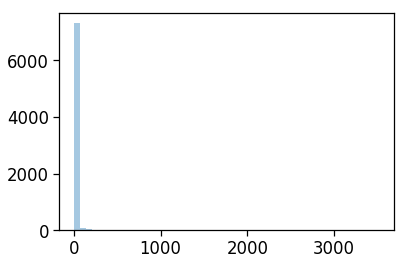

In [30]:
sns.distplot(freqs, kde=False)
pass

### Zipf's law

The number of words that occur with frequency $f$ is a random variable with a power law distribution

$$
p(f) = \alpha f^{1-1/s}
$$

Random variables that follow a power law distribution look linear on a log-log plot.

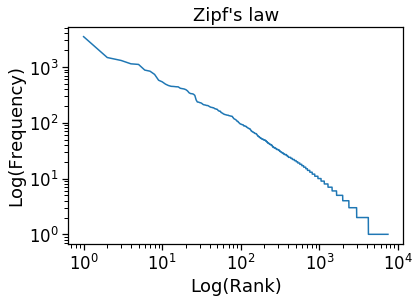

In [31]:
xs = freqs.sort_values(ascending=False).reset_index(drop=True, )
plt.loglog(xs.index + 1, xs)
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.title("Zipf's law")
pass

### Stop words, lemmatization and stemming

We can try to reduce the number of tokens using the simple strategies of stop words, stemming and lemmatization.

#### Stop words

The most common words are not very informative, and we may wish to remove them. There are other ways to handle this (e.g. with TF-IDF vectorizers) but we will simply use stop words for this section.

In [32]:
vectorizer = CountVectorizer(stop_words='english')

In [33]:
idx = np.nonzero(
    newsgroups_train.target == 
    newsgroups_train.target_names.index('rec.sport.baseball')
)[0]
baseball_sample = [newsgroups_train.data[i] for i in idx]

In [34]:
X = vectorizer.fit_transform(baseball_sample)

In [35]:
vocab = vectorizer.get_feature_names()

In [36]:
rownames = [':'.join(filename.split('/')[-2:]) 
            for filename in newsgroups_train.filenames[idx]]
df = pd.SparseDataFrame(X, columns=vocab, index=rownames)

In [37]:
freqs = df.sum(axis=0).astype('int')

We will also drop numbers.

In [38]:
freqs = freqs[~freqs.index.str.isnumeric()]

Now the most common words are more informative.

In [39]:
freqs.nlargest(15)

year        310
game        204
good        200
team        195
think       189
don         186
just        161
like        153
games       149
better      140
baseball    137
hit         137
runs        137
players     135
time        131
dtype: int64

#### Stemming

Stemming is the attempt to identify the common roots of words using prefix and suffix rules.

In [40]:
def tokenize(text):
    stem = SnowballStemmer('english')
    text = text.lower()
    
    for token in nltk.word_tokenize(text):
        if token in string.punctuation:
            continue
        yield stem.stem(token)

In [41]:
text = '''circle circles circular circularity 
circumference circumscribe circumstantial
infer inference inferences inferential'''

In [42]:
list(tokenize(text))

['circl',
 'circl',
 'circular',
 'circular',
 'circumfer',
 'circumscrib',
 'circumstanti',
 'infer',
 'infer',
 'infer',
 'inferenti']

#### Lemmatization

Lemmatization also attempts to identify the common roots of words, but uses dictionary lookup to do so. Lemmatization often gives better results than stemming, but is slower.

In [43]:
def tokenize(text):
    lem = WordNetLemmatizer()
    text = text.lower()
    
    for token in nltk.word_tokenize(text):
        if token in string.punctuation:
            continue
        yield lem.lemmatize(token)

In [44]:
list(tokenize(text))

['circle',
 'circle',
 'circular',
 'circularity',
 'circumference',
 'circumscribe',
 'circumstantial',
 'infer',
 'inference',
 'inference',
 'inferential']

### Word cloud

In [45]:
from wordcloud import WordCloud

In [46]:
wordcloud = WordCloud().generate(' '.join(freqs.nlargest(200).index))
pass

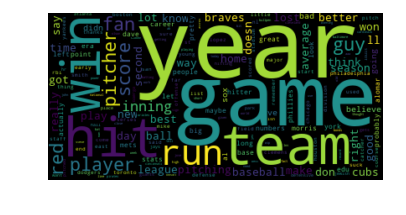

In [47]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
pass

In [48]:
from imageio import imread

In [49]:
rabbit = imread('data/rabbit.png').astype('ubyte')

In [50]:
wc = WordCloud(mask=rabbit[:,:,0], 
               mode='RGBA',
               background_color=None)
wc.generate(' '.join(freqs.nlargest(200).index))
pass

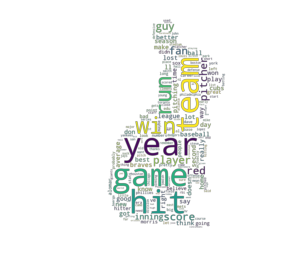

In [51]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
pass

## Supervised Learning

A general framework for supervised learning on text is

construct corpus $\to$ vectorization of features $\to$ classification $\to$ evaluation (often by cross-validation)

For example, we may classify documents into topics, or by sentiment, or as spam/not spam.

### Vectorization of features

There are 3 common methods to vectorize features when the text is treated as a bag of words - word count, one hot encoding and TF-IDF.

In [52]:
small_sample = """Do you like green eggs and ham?
I do not like them, Sam-I-am.
I do not like green eggs and ham!
Would you like them here or there?
I would not like them here or there.
I would not like them anywhere.
I do so like green eggs and ham!
Thank you! Thank you,
Sam-I-am!""".splitlines()

In [53]:
small_sample

['Do you like green eggs and ham?',
 'I do not like them, Sam-I-am.',
 'I do not like green eggs and ham!',
 'Would you like them here or there?',
 'I would not like them here or there.',
 'I would not like them anywhere.',
 'I do so like green eggs and ham!',
 'Thank you! Thank you,',
 'Sam-I-am!']

#### Word counts

In [54]:
count_vectorizer = CountVectorizer()

In [55]:
X = count_vectorizer.fit_transform(small_sample)

In [56]:
vocab = count_vectorizer.get_feature_names()
df = pd.SparseDataFrame(X, columns=vocab)
df.fillna(0).iloc[:, :10]

,am,and,anywhere,do,eggs,green,ham,here,like,not
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Hashing

If the number of words is too large, we can hash words into a fixed number of buckets to keep the computations tractable. However, we lose the ability to map back to the original tokens.

In [57]:
hash_vectorizer = HashingVectorizer(n_features=5)

In [58]:
X = hash_vectorizer.fit_transform(small_sample)

In [59]:
X.toarray()

array([[-0.60302269,  0.30151134,  0.30151134,  0.30151134,  0.60302269],
       [ 0.5       ,  0.5       ,  0.        ,  0.5       , -0.5       ],
       [-0.60302269,  0.30151134,  0.30151134,  0.30151134,  0.60302269],
       [-0.57735027,  0.        ,  0.57735027,  0.        , -0.57735027],
       [-0.57735027,  0.        ,  0.57735027,  0.        , -0.57735027],
       [-0.90453403,  0.        ,  0.        ,  0.30151134, -0.30151134],
       [-0.60302269,  0.30151134,  0.30151134,  0.30151134,  0.60302269],
       [-0.70710678,  0.        ,  0.        ,  0.70710678,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

#### One hot encoding

One hot encoding simply sets words with non-zero counts to 1.

In [60]:
one_hot_vectorizer = CountVectorizer(binary=True)

In [61]:
X = one_hot_vectorizer.fit_transform(small_sample)

In [62]:
vocab = one_hot_vectorizer.get_feature_names()
df = pd.SparseDataFrame(X, columns=vocab)
df.fillna(0).iloc[:, :10]

,am,and,anywhere,do,eggs,green,ham,here,like,not
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### TF-IDF

You have previously implemented this in your homework.

In [63]:
tf_idf_vectorizer = TfidfVectorizer()

In [64]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [65]:
X = tf_idf_vectorizer.fit_transform(small_sample)

In [66]:
vocab = tf_idf_vectorizer.get_feature_names()
df = pd.SparseDataFrame(X, columns=vocab)
df.fillna(0).iloc[:, :10]

,am,and,anywhere,do,eggs,green,ham,here,like,not
0,0.000000,0.401996,0.00000,0.355186,0.401996,0.401996,0.401996,0.000000,0.256589,0.000000
1,0.495165,0.000000,0.00000,0.380398,0.000000,0.000000,0.000000,0.000000,0.274803,0.380398
2,0.000000,0.409316,0.00000,0.361653,0.409316,0.409316,0.409316,0.000000,0.261261,0.361653
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.429929,0.238598,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.436672,0.242341,0.335463
5,0.000000,0.000000,0.62005,0.000000,0.000000,0.000000,0.000000,0.000000,0.290641,0.402322
6,0.000000,0.376827,0.00000,0.332947,0.376827,0.376827,0.376827,0.000000,0.240523,0.000000
7,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.707107,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Maintaining context

For some supervised learning tasks such as sentiment analysis (is this review positive or negative), the context of words is very important. For example the following two reviews use very similar words but have very different meanings.

- `Only an idiot like Reviewer two could love that movie`
- `Could not love that movie more. Reviewer one is an idiot`

In this case, we need to take the context of individual words into account. Common ways to take context into account include the use N-grams (also known as colocations), part-of-speech (POS) tagging and grammars, and the `word2vec` family of algorithms.

### N-grams

In [67]:
count_vectorizer = CountVectorizer(ngram_range=(1,3))

In [68]:
X = count_vectorizer.fit_transform(small_sample)

In [69]:
vocab = count_vectorizer.get_feature_names()
df = pd.SparseDataFrame(X, columns=vocab)
df.fillna(0).iloc[:, :10]

,am,and,and ham,anywhere,do,do not,do not like,do so,do so like,do you
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Significant collocation

Most n-grams are not meaningfully phrases. We can use statistical tests for the likelihood of co-occurrence of words, and only use the significant collocations. Basically we test against the null hypothesis that the words in the n-gram appear by chance if the probability of each word was independently derived from its empirical frequency. 

In [70]:
abstract = '''Macrophages represent one of the most numerous and diverse 
leukocyte types in the body. Furthermore, they are important regulators 
and promoters of many cardiovascular disease programs. Their functions 
range from sensing pathogens to digesting cell debris, modulating inflammation, 
and producing key cytokines and other regulatory factors throughout the body. 
Macrophage research has undergone a renaissance in recent years, which 
has propelled a newfound interest in their heterogeneity as well as a 
new understanding of ontological differences in their development. 
In addition, recent technological advances such as single-cell 
mass-cytometry by time-of-flight have enabled phenotype and functional 
analyses of individual immune myeloid cells, including macrophages, 
at unprecedented resolution. In this Part 1 of a 4-part review series 
covering the macrophage in cardiovascular disease, we focus on the 
basic principles of macrophage development, heterogeneity, phenotype, 
tissue-specific differentiation, and functionality as a basis to understand 
their role in cardiovascular disease.'''

In [71]:
ngrams = TrigramCollocationFinder.from_words(nltk.tokenize.word_tokenize(abstract))

In [72]:
scores = ngrams.score_ngrams(TrigramAssocMeasures.likelihood_ratio)

In [73]:
scores[:5]

[(('in', 'cardiovascular', 'disease'), 60.22140084295821),
 (('cardiovascular', 'disease', 'programs'), 57.490270384342544),
 (('many', 'cardiovascular', 'disease'), 57.490270384342544),
 (('cardiovascular', 'disease', '.'), 49.568274269761346),
 (('cardiovascular', 'disease', ','), 47.586079738744886)]

In [74]:
scores[-5:]

[(('development', ',', 'heterogeneity'), 18.377430413805826),
 (('heterogeneity', ',', 'phenotype'), 18.377430413805826),
 (('the', 'macrophage', 'in'), 17.35538066534174),
 ((',', 'heterogeneity', ','), 12.326088385780718),
 ((',', 'phenotype', ','), 12.326088385780718)]

## Part-of-speech tagging

Regex for grammar from this [blog](http://bdewilde.github.io/blog/2014/09/23/intro-to-automatic-keyphrase-extraction/)

#### Parts of speech in NLTK

In [75]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

Using a [paragraph](https://en.wikipedia.org/wiki/Alfred_Nobel) from Wikipedia.

In [76]:
nobel = "Born in Stockholm, Alfred Nobel was the third son of Immanuel Nobel (1801–1872), an inventor and engineer, and Carolina Andriette (Ahlsell) Nobel (1805–1889).The couple married in 1827 and had eight children. The family was impoverished, and only Alfred and his three brothers survived past childhood. Through his father, Alfred Nobel was a descendant of the Swedish scientist Olaus Rudbeck (1630–1702),and in his turn the boy was interested in engineering, particularly explosives, learning the basic principles from his father at a young age. Alfred Nobel's interest in technology was inherited from his father, an alumnus of Royal Institute of Technology in Stockholm."

In [77]:
nobel

"Born in Stockholm, Alfred Nobel was the third son of Immanuel Nobel (1801–1872), an inventor and engineer, and Carolina Andriette (Ahlsell) Nobel (1805–1889).The couple married in 1827 and had eight children. The family was impoverished, and only Alfred and his three brothers survived past childhood. Through his father, Alfred Nobel was a descendant of the Swedish scientist Olaus Rudbeck (1630–1702),and in his turn the boy was interested in engineering, particularly explosives, learning the basic principles from his father at a young age. Alfred Nobel's interest in technology was inherited from his father, an alumnus of Royal Institute of Technology in Stockholm."

In [78]:
text = nltk.word_tokenize(nobel)

In [79]:
pos = nltk.pos_tag(text)

In [80]:
pos[:32]

[('Born', 'VBN'),
 ('in', 'IN'),
 ('Stockholm', 'NNP'),
 (',', ','),
 ('Alfred', 'NNP'),
 ('Nobel', 'NNP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('third', 'JJ'),
 ('son', 'NN'),
 ('of', 'IN'),
 ('Immanuel', 'NNP'),
 ('Nobel', 'NNP'),
 ('(', '('),
 ('1801–1872', 'CD'),
 (')', ')'),
 (',', ','),
 ('an', 'DT'),
 ('inventor', 'NN'),
 ('and', 'CC'),
 ('engineer', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('Carolina', 'NNP'),
 ('Andriette', 'NNP'),
 ('(', '('),
 ('Ahlsell', 'NNP'),
 (')', ')'),
 ('Nobel', 'NNP'),
 ('(', '('),
 ('1805–1889', 'CD'),
 (')', ')')]

In [81]:
grammar = 'KP: {(<JJ>* <NN.*>+ <IN>)? <JJ>* <NN.*>+}'

In [82]:
chunker = nltk.RegexpParser(grammar)

In [83]:
tree = chunker.parse(pos[:32])

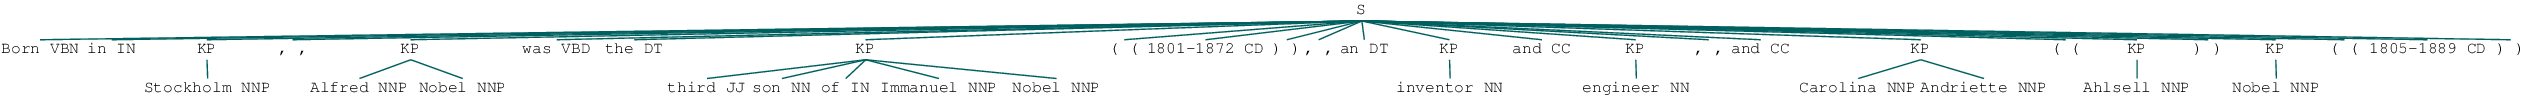

In [84]:
tree

In [85]:
tree.collapse_unary

<bound method Tree.collapse_unary of Tree('S', [('Born', 'VBN'), ('in', 'IN'), Tree('KP', [('Stockholm', 'NNP')]), (',', ','), Tree('KP', [('Alfred', 'NNP'), ('Nobel', 'NNP')]), ('was', 'VBD'), ('the', 'DT'), Tree('KP', [('third', 'JJ'), ('son', 'NN'), ('of', 'IN'), ('Immanuel', 'NNP'), ('Nobel', 'NNP')]), ('(', '('), ('1801–1872', 'CD'), (')', ')'), (',', ','), ('an', 'DT'), Tree('KP', [('inventor', 'NN')]), ('and', 'CC'), Tree('KP', [('engineer', 'NN')]), (',', ','), ('and', 'CC'), Tree('KP', [('Carolina', 'NNP'), ('Andriette', 'NNP')]), ('(', '('), Tree('KP', [('Ahlsell', 'NNP')]), (')', ')'), Tree('KP', [('Nobel', 'NNP')]), ('(', '('), ('1805–1889', 'CD'), (')', ')')])>

In [86]:
import itertools

In [87]:
kps = [ ]
for key, group in itertools.groupby(nltk.tree2conlltags(tree), lambda x: x[-1]):
    if key != 'O':
        phrase = []
        for word, pos, cls in group:
            phrase.append(word)
        kps.append(' '.join(phrase))
kps

['Stockholm',
 'Alfred',
 'Nobel',
 'third',
 'son of Immanuel Nobel',
 'inventor',
 'engineer',
 'Carolina',
 'Andriette',
 'Ahlsell',
 'Nobel']

### Finding named entities

We use a pre-trained model from `spacy`. See [here](https://spacy.io/usage/training#ner) if you want to train on your own corpus or extend the pre-trained model.

The default model is not perfect, but may be good enough for your needs.

In [88]:
import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [89]:
doc = nlp(nobel)

In [90]:
print([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(Born, 'O', ''), (in, 'O', ''), (Stockholm, 'B', 'GPE'), (,, 'O', ''), (Alfred, 'B', 'PERSON'), (Nobel, 'I', 'PERSON'), (was, 'O', ''), (the, 'O', ''), (third, 'B', 'ORDINAL'), (son, 'O', ''), (of, 'O', ''), (Immanuel, 'B', 'PERSON'), (Nobel, 'I', 'PERSON'), ((, 'O', ''), (1801–1872, 'B', 'CARDINAL'), (), 'O', ''), (,, 'O', ''), (an, 'O', ''), (inventor, 'O', ''), (and, 'O', ''), (engineer, 'O', ''), (,, 'O', ''), (and, 'O', ''), (Carolina, 'B', 'PERSON'), (Andriette, 'I', 'PERSON'), ((, 'O', ''), (Ahlsell, 'O', ''), (), 'O', ''), (Nobel, 'B', 'WORK_OF_ART'), ((, 'O', ''), (1805–1889).The, 'O', ''), (couple, 'O', ''), (married, 'O', ''), (in, 'O', ''), (1827, 'B', 'DATE'), (and, 'O', ''), (had, 'O', ''), (eight, 'B', 'CARDINAL'), (children, 'O', ''), (., 'O', ''), (The, 'O', ''), (family, 'O', ''), (was, 'O', ''), (impoverished, 'O', ''), (,, 'O', ''), (and, 'O', ''), (only, 'O', ''), (Alfred, 'B', 'PERSON'), (and, 'O', ''), (his, 'O', ''), (three, 'B', 'CARDINAL'), (brothers, 'O', ''

In [91]:
displacy.render(doc, jupyter=True, style='ent')

In [92]:
for entity in doc.ents:
    if entity.label_ == 'PERSON':
        print(entity)

Alfred Nobel
Immanuel Nobel
Carolina Andriette
Alfred
Alfred Nobel
Olaus Rudbeck
Alfred Nobel's
